<a href="https://colab.research.google.com/github/venuannamdas/E_clean_AI/blob/master/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of the Project: **Towards clean and Green E-mail Communication for Managers, Scientists, Engineers and Medicos by optimized Email Visualization using smart AI Algorithms.

**Objectives**:
 First to develop E-mail response recommendations/classifications as given below.

(1) time_waste: If the email consisted of promotional data, out of scope information for the user, spam mails and of it was an end of the conversation it was labelled as time_waste.

(2)reply: If the email contains a reply then it was tagged as reply (sent)

(3)required_response: if the email was not replied and did have some important information it was tagged as thread

The proposed solution is to build a email ranker which lists a priority based emailset, this would be augmented with a recommendation system which provides a probable course of action which would be performed on the emails

Next, reading the email body and understanding its contents and providing possible insights.

Finally, AI algorithms cannot be same for all the sectors or all the users alike, it has to be cattered based on Organization and Its employees.

(Title:Motivation for the Project: Clean and Green Singapore https://www.cgs.gov.sg/)

Dataset Sources:
(basic)
https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

Modified: https://github.com/venuannamdas/E_clean_AI/blob/master/preparatory.ipynb

References:

 https://www.demandsage.com/how-many-emails-are-sent-per-day/

https://earthweb.com/how-many-emails-does-the-average-person-receive-per-day/#:~:text=billion%20by%202023.-,2.,by%20an%20average%20office%20worker

https://www.slicktext.com/blog/2019/06/survey-workplace-communication-statistics/#:~:text=Almost%20half%20(45.6%25)%20of,some%20emails%20in%20their%20inbox

https://www.digitalinformationworld.com/2023/01/people-spend-33-less-time-reading.html#:~:text=Back%20in%202018%2C%20studies%20showed,considered%20and%20taken%20into%20account

https://hbr.org/2019/01/how-to-spend-way-less-time-on-email-every-day#:~:text=The%20average%20professional%20spends%2028,120%20messages%20received%20per%20day


https://hbr.org/2019/01/how-to-spend-way-less-time-on-email-every-day#:~:text=The%20average%20professional%20spends%2028,120%20messages%20received%20per%20day

In [129]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Bussiness context

1. Global Email Growth

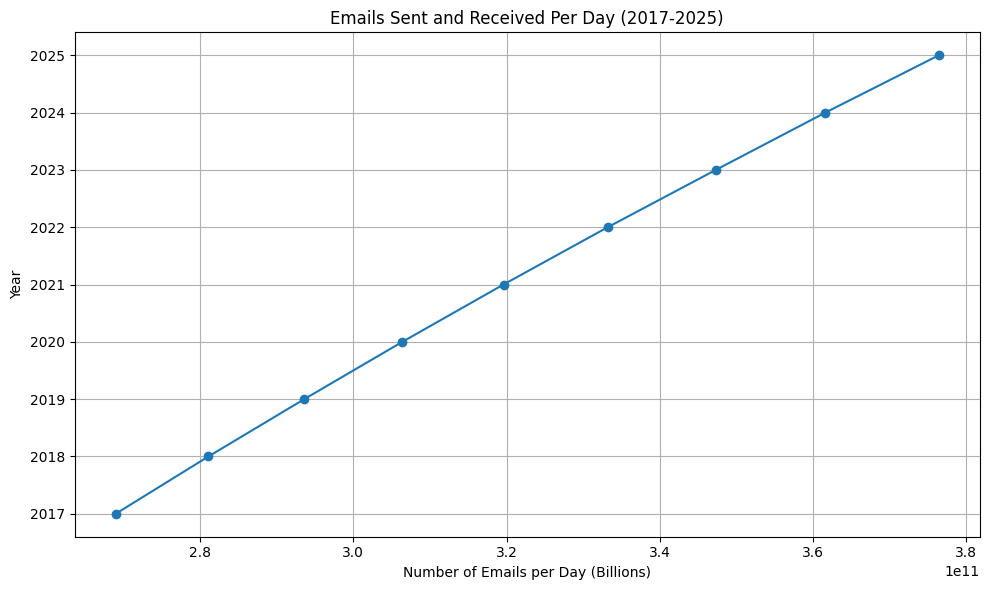

In [131]:
import matplotlib.pyplot as plt

# Data for the first subplot (plot1)
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
emails_per_day = [269e9, 281.1e9, 293.6e9, 306.4e9, 319.6e9, 333.2e9, 347.3e9, 361.6e9, 376.4e9]

# Create a figure with 1 subplot
plt.figure(figsize=(10, 6))

# First subplot (plot1)
plt.plot(emails_per_day, years, marker='o', linestyle='-')
plt.title('Emails Sent and Received Per Day (2017-2025)')
plt.xlabel('Number of Emails per Day (Billions)')
plt.ylabel('Year')
plt.grid(True)

# Show the figure for Figure 1 ("plot1")
plt.tight_layout()
plt.show()



2. Global statistics and Individual consumer statistics

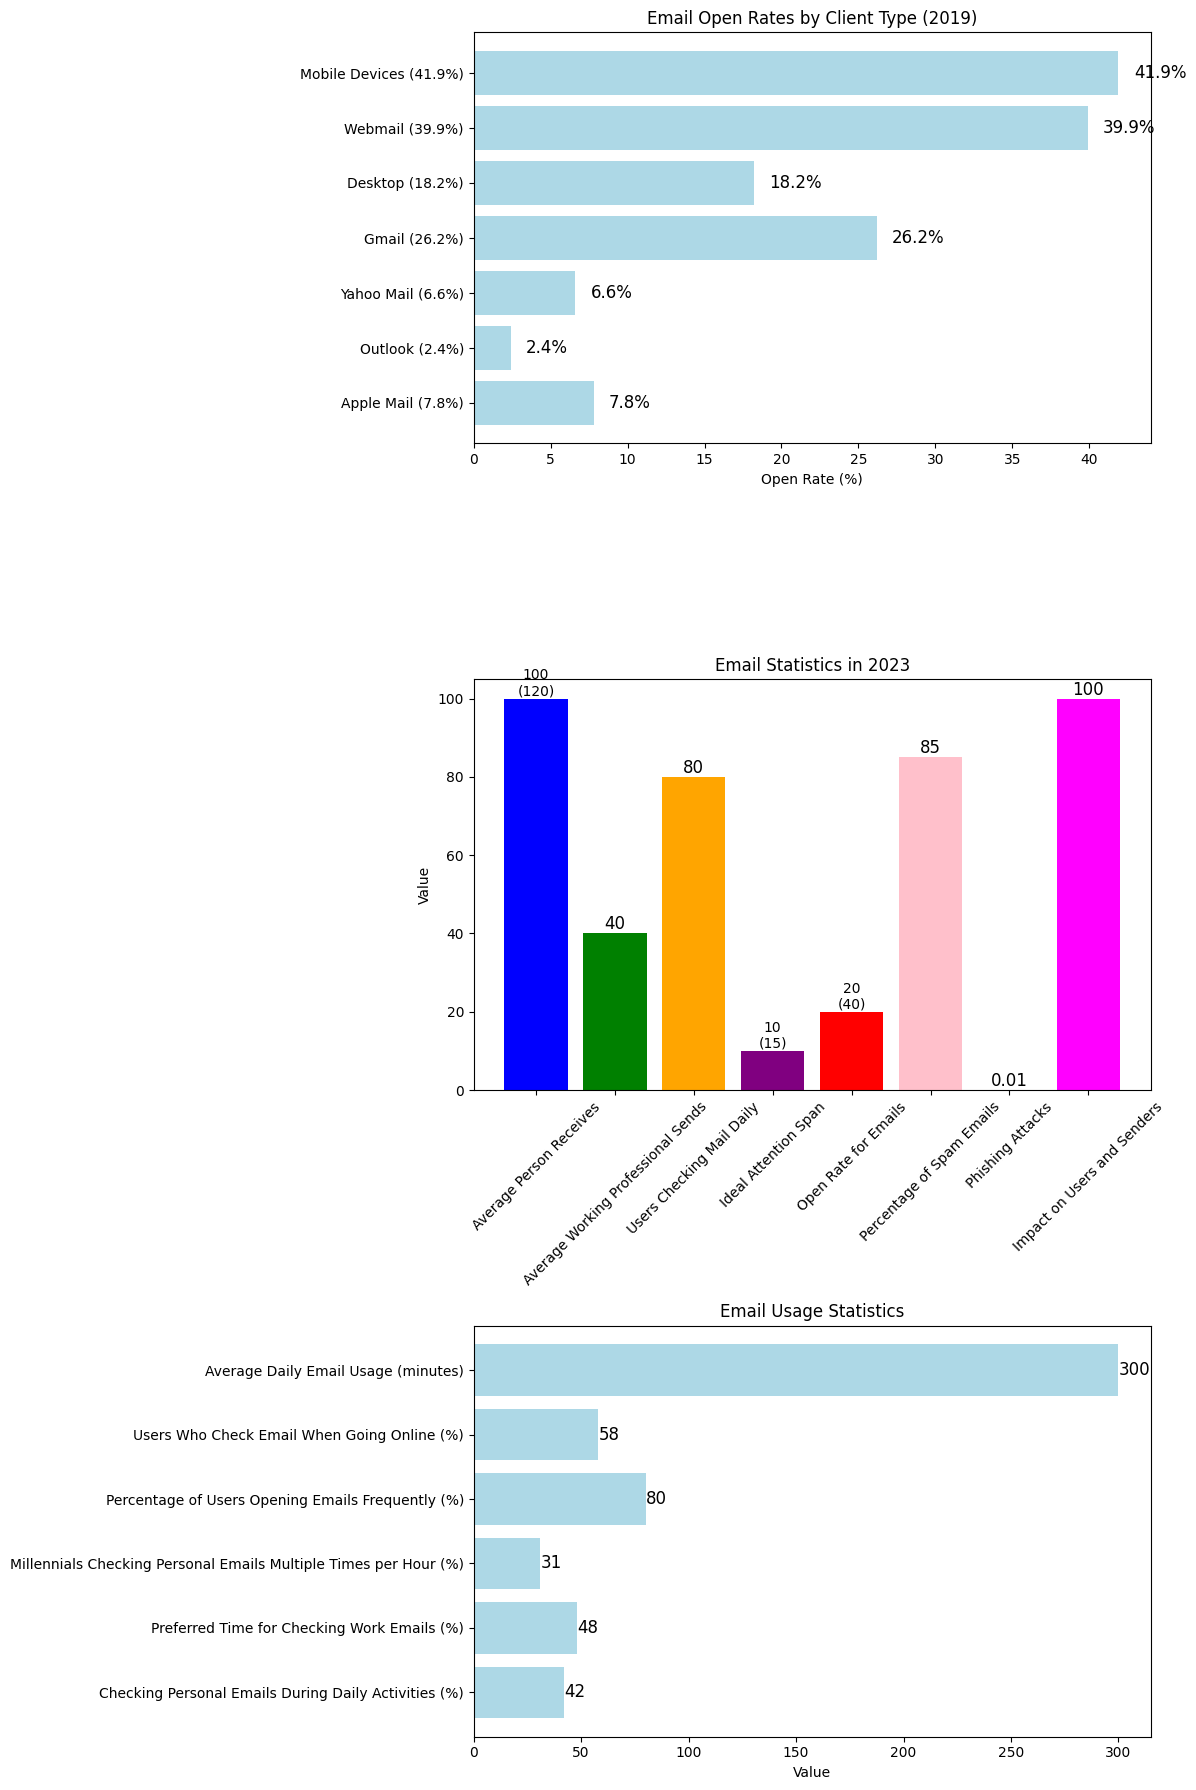

In [132]:
import matplotlib.pyplot as plt

# Data for the first subplot (1)
categories1 = [
    "Mobile Devices (41.9%)",
    "Webmail (39.9%)",
    "Desktop (18.2%)",
    "Gmail (26.2%)",
    "Yahoo Mail (6.6%)",
    "Outlook (2.4%)",
    "Apple Mail (7.8%)",
]

open_rates1 = [41.9, 39.9, 18.2, 26.2, 6.6, 2.4, 7.8]

# Data for the second subplot (2)
categories2 = [
    "Average Person Receives",
    "Average Working Professional Sends",
    "Users Checking Mail Daily",
    "Ideal Attention Span",
    "Open Rate for Emails",
    "Percentage of Spam Emails",
    "Phishing Attacks",
    "Impact on Users and Senders",
]

values2 = [
    (100, 120),
    40,
    80,
    (10, 15),
    (20, 40),
    85,
    1 / 99,
    100,
]

colors2 = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'cyan', 'magenta', 'brown', 'gray']

# Data for the third subplot (3)
email_stats1 = [
    "Average Daily Email Usage (minutes)",
    "Users Who Check Email When Going Online (%)",
    "Percentage of Users Opening Emails Frequently (%)",
    "Millennials Checking Personal Emails Multiple Times per Hour (%)",
    "Preferred Time for Checking Work Emails (%)",
    "Checking Personal Emails During Daily Activities (%)",
]

values1 = [
    300,  # Total daily usage (work + personal)
    58,
    80,
    31,
    48,  # Don't want to check until working
    42,  # Getting ready or eating breakfast
]

# Create a figure with 3 subplots in a vertical layout
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# First subplot (1)
axs[0].barh(categories1, open_rates1, color='lightblue')
axs[0].set_xlabel('Open Rate (%)')
axs[0].set_title('Email Open Rates by Client Type (2019)')
for i in range(len(categories1)):
    axs[0].text(open_rates1[i] + 1, i, f'{open_rates1[i]:.1f}%', va='center', fontsize=12)
axs[0].invert_yaxis()

# Second subplot (2)
bars = axs[1].bar(categories2, [round(value, 2) if not isinstance(value, tuple) else round(value[0], 2) for value in values2], color=colors2)
axs[1].set_title('Email Statistics in 2023')
axs[1].set_ylabel('Value')
axs[1].tick_params(axis='x', rotation=45, labelbottom=True)

# Annotate the values on the bars for the second subplot
for bar, value in zip(bars, values2):
    if isinstance(value, tuple):
        axs[1].text(bar.get_x() + bar.get_width() / 2, value[0], f"{round(value[0], 2)}\n({round(value[1], 2)})", ha='center', va='bottom', fontsize=10)
    else:
        axs[1].text(bar.get_x() + bar.get_width() / 2, value, round(value, 2), ha='center', va='bottom', fontsize=12)

# Third subplot (3)
axs[2].barh(email_stats1, values1, color='lightblue')
axs[2].set_xlabel('Value')
axs[2].set_title('Email Usage Statistics')

# Add data labels to the third chart
for i in range(len(email_stats1)):
    axs[2].text(values1[i] + 0.1, i, str(values1[i]), va='center', fontsize=12)
axs[2].invert_yaxis()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all three subplots
plt.show()


3. Global Market share - Market platform preferences

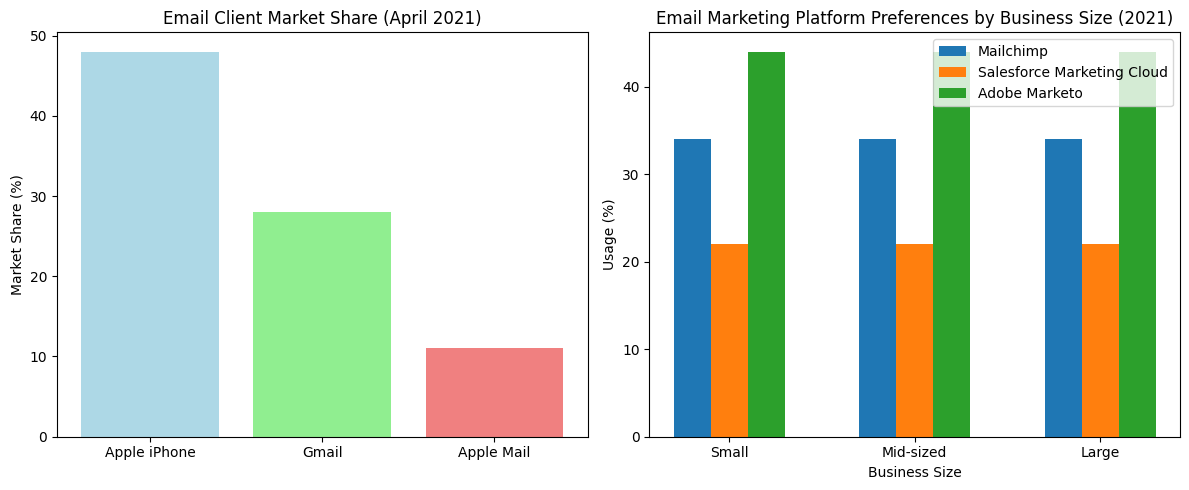

In [133]:
import matplotlib.pyplot as plt

# Data
email_clients = ['Apple iPhone', 'Gmail', 'Apple Mail']
market_share = [48, 28, 11]  # Market share percentages
business_sizes = ['Small', 'Mid-sized', 'Large']
market_platforms = ['Mailchimp', 'Salesforce Marketing Cloud', 'Adobe Marketo']
platform_usage = [34, 22, 44]  # Platform usage percentages

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot email client market share
axes[0].bar(email_clients, market_share, color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0].set_ylabel('Market Share (%)')
axes[0].set_title('Email Client Market Share (April 2021)')

# Plot email marketing platform preferences by business size
bar_width = 0.2
index = range(len(business_sizes))
for i, platform in enumerate(market_platforms):
    axes[1].bar([x + i * bar_width for x in index], platform_usage[i::3], bar_width, label=platform)

axes[1].set_xlabel('Business Size')
axes[1].set_ylabel('Usage (%)')
axes[1].set_title('Email Marketing Platform Preferences by Business Size (2021)')
axes[1].set_xticks([x + bar_width for x in index])
axes[1].set_xticklabels(business_sizes)
axes[1].legend(loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()


3. Covid-19 Influence on Email (including US statistics)

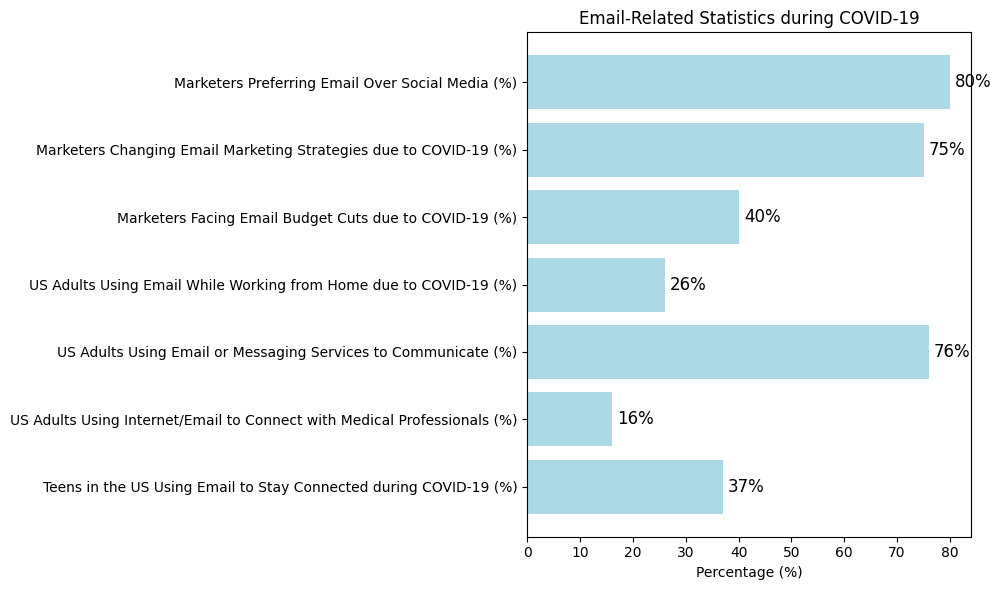

In [134]:
import matplotlib.pyplot as plt

# Data for the second subplot
statistics = [
    "Marketers Preferring Email Over Social Media (%)",
    "Marketers Changing Email Marketing Strategies due to COVID-19 (%)",
    "Marketers Facing Email Budget Cuts due to COVID-19 (%)",
    "US Adults Using Email While Working from Home due to COVID-19 (%)",
    "US Adults Using Email or Messaging Services to Communicate (%)",
    "US Adults Using Internet/Email to Connect with Medical Professionals (%)",
    "Teens in the US Using Email to Stay Connected during COVID-19 (%)",
]

values2 = [
    80,
    75,
    40,
    26,
    76,
    16,
    37,
]

# Create a bar chart for the second set of data
plt.figure(figsize=(10, 6))
plt.barh(statistics, values2, color='lightblue')
plt.xlabel('Percentage (%)')
plt.title('Email-Related Statistics during COVID-19')

# Add data labels
for i in range(len(statistics)):
    plt.text(values2[i] + 1, i, str(values2[i]) + '%', va='center', fontsize=12)

plt.gca().invert_yaxis()  # Reverse the order of statistics

# Display the chart
plt.tight_layout()
plt.show()



4. Role of Email in marketing strategy

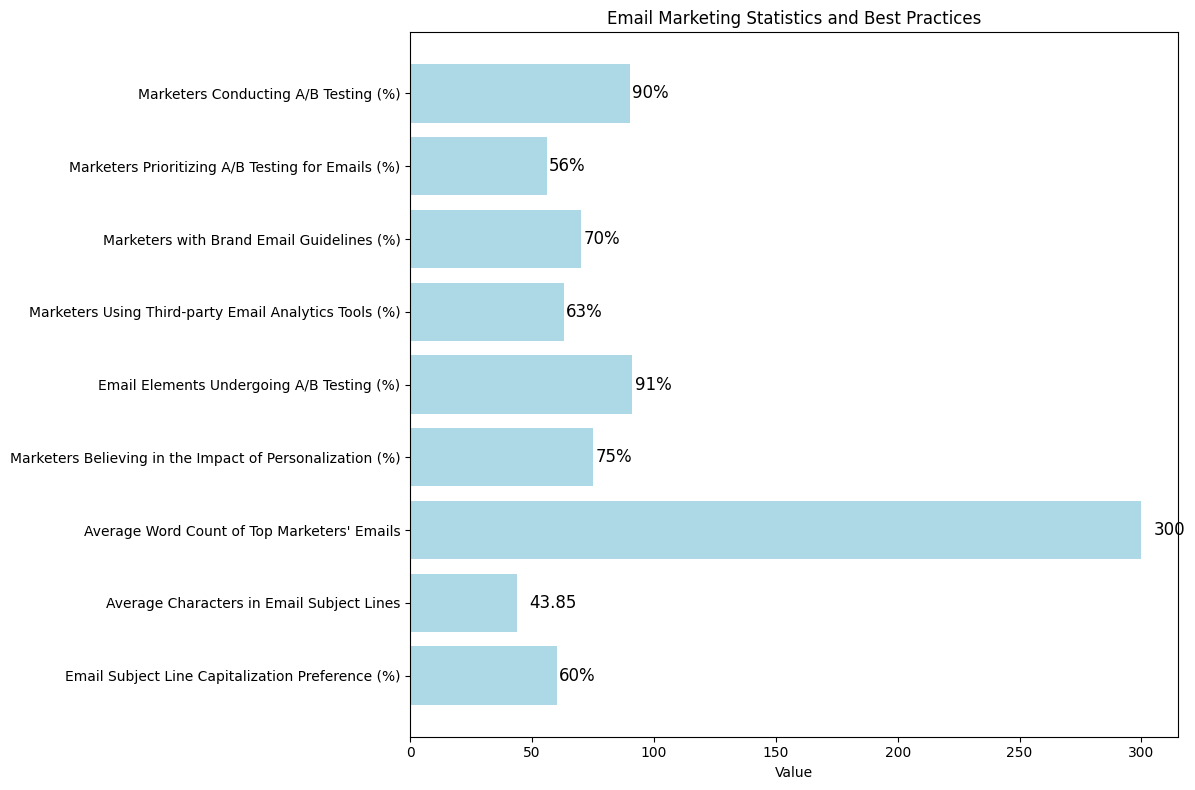

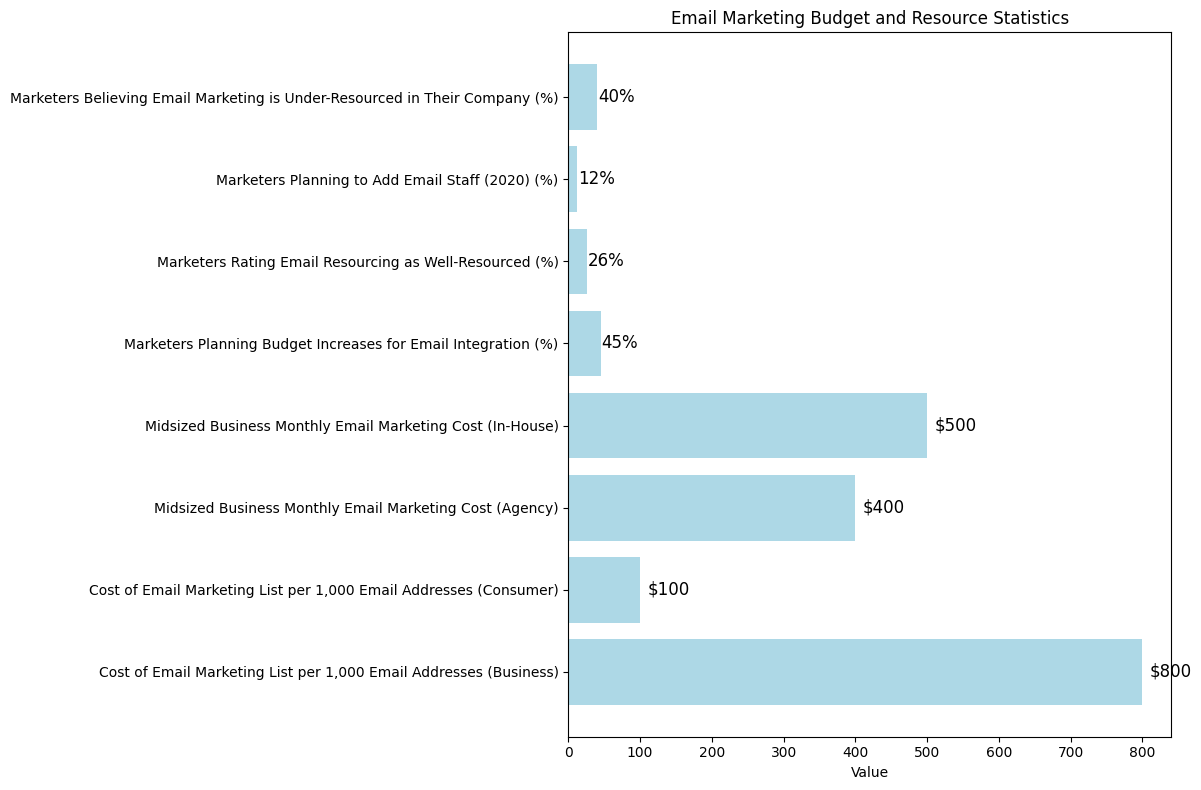

In [135]:
import matplotlib.pyplot as plt

# Data
email_stats = [
    "Marketers Conducting A/B Testing (%)",
    "Marketers Prioritizing A/B Testing for Emails (%)",
    "Marketers with Brand Email Guidelines (%)",
    "Marketers Using Third-party Email Analytics Tools (%)",
    "Email Elements Undergoing A/B Testing (%)",
    "Marketers Believing in the Impact of Personalization (%)",
    "Average Word Count of Top Marketers' Emails",
    "Average Characters in Email Subject Lines",
    "Email Subject Line Capitalization Preference (%)",
]

values = [
    90,
    56,
    70,
    63,
    91,
    75,
    300,
    43.85,
    60,
]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(email_stats, values, color='lightblue')
plt.xlabel('Value')
plt.title('Email Marketing Statistics and Best Practices')

# Add data labels
for i in range(len(email_stats)):
    if '%' in email_stats[i]:
        plt.text(values[i] + 1, i, str(values[i]) + '%', va='center', fontsize=12)
    else:
        plt.text(values[i] + 5, i, str(values[i]), va='center', fontsize=12)

# Display the chart
plt.gca().invert_yaxis()  # Reverse the order of statistics
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Data
budget_stats = [
    "Marketers Believing Email Marketing is Under-Resourced in Their Company (%)",
    "Marketers Planning to Add Email Staff (2020) (%)",
    "Marketers Rating Email Resourcing as Well-Resourced (%)",
    "Marketers Planning Budget Increases for Email Integration (%)",
    "Midsized Business Monthly Email Marketing Cost (In-House)",
    "Midsized Business Monthly Email Marketing Cost (Agency)",
    "Cost of Email Marketing List per 1,000 Email Addresses (Consumer)",
    "Cost of Email Marketing List per 1,000 Email Addresses (Business)",
]

values = [
    40,
    12,
    26,
    45,
    500,
    400,
    100,
    800,
]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(budget_stats, values, color='lightblue')
plt.xlabel('Value')
plt.title('Email Marketing Budget and Resource Statistics')

# Add data labels
for i in range(len(budget_stats)):
    if '%' in budget_stats[i]:
        plt.text(values[i] + 1, i, str(values[i]) + '%', va='center', fontsize=12)
    else:
        plt.text(values[i] + 10, i, '$' + str(values[i]), va='center', fontsize=12)

# Display the chart
plt.gca().invert_yaxis()  # Reverse the order of statistics
plt.tight_layout()
plt.show()


5. Emails-influencing individuals and there is need for AI to help them

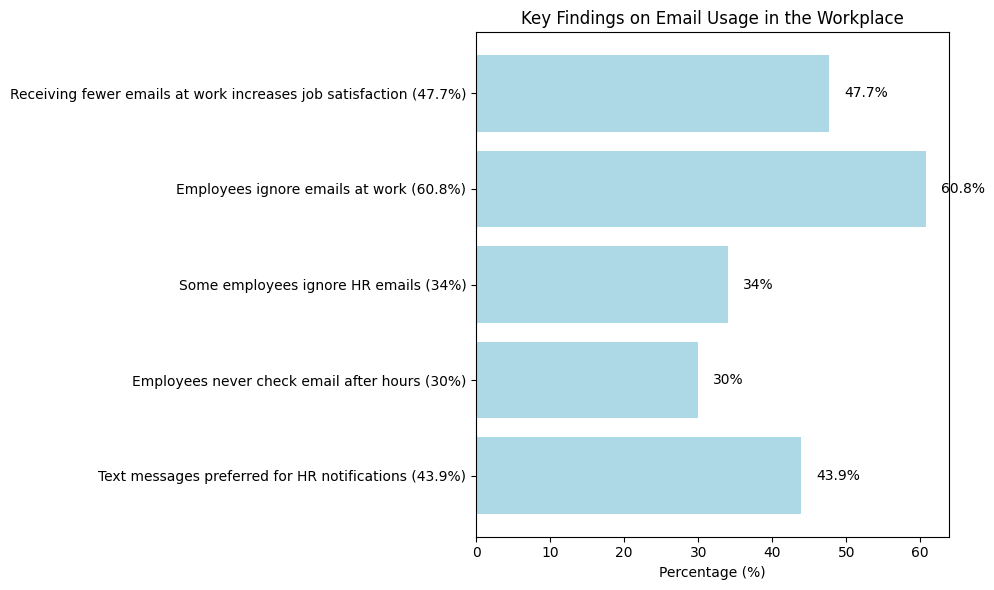

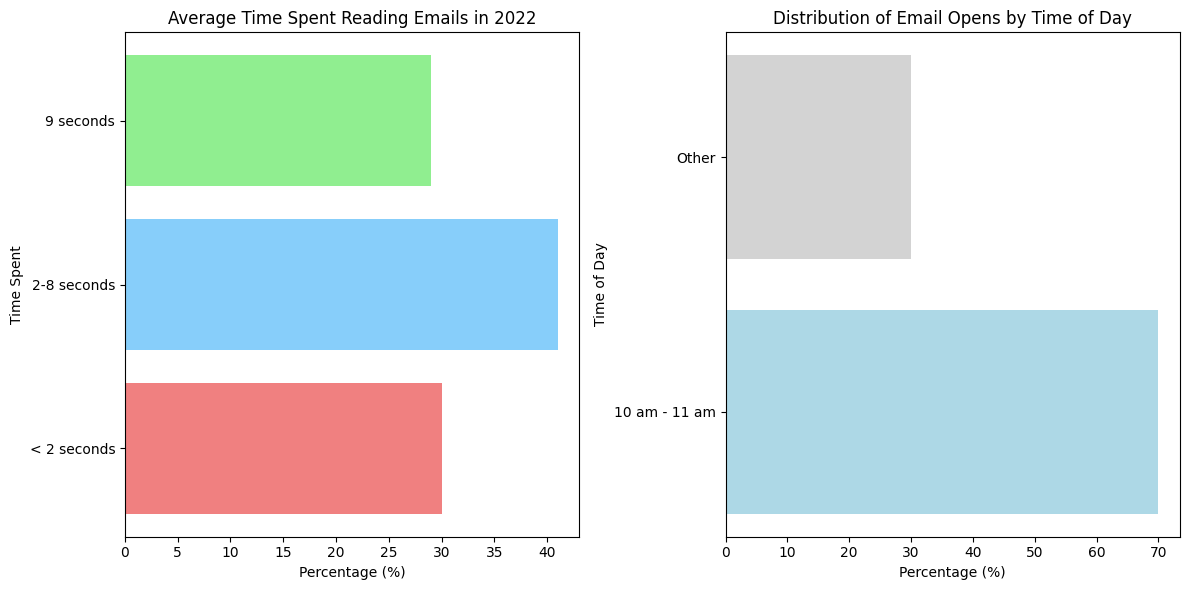

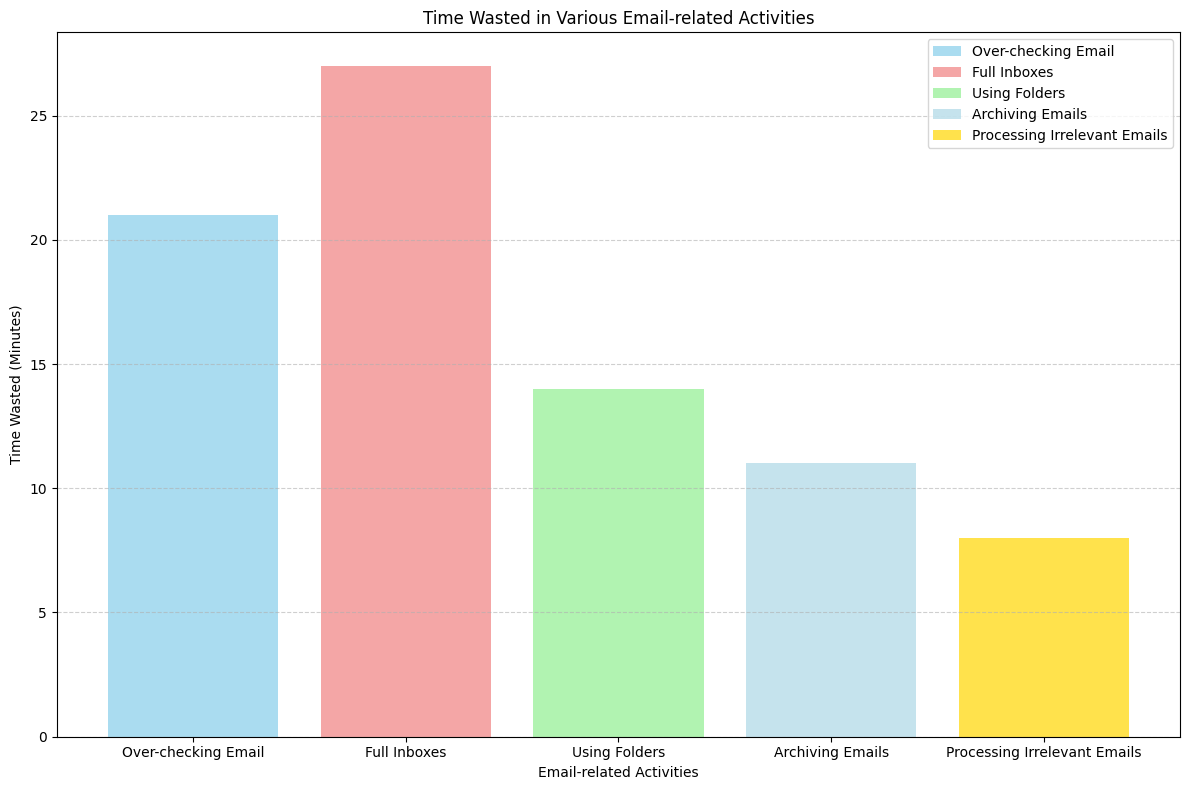

In [136]:
# Key findings data
findings = [
    "Receiving fewer emails at work increases job satisfaction (47.7%)",
    "Employees ignore emails at work (60.8%)",
    "Some employees ignore HR emails (34%)",
    "Employees never check email after hours (30%)",
    "Text messages preferred for HR notifications (43.9%)"
]

# Corresponding percentages
percentages = [47.7, 60.8, 34, 30, 43.9]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(findings, percentages, color='lightblue')

# Adding labels and title
plt.xlabel('Percentage (%)')
plt.title('Key Findings on Email Usage in the Workplace')

# Adding data labels
for i, percentage in enumerate(percentages):
    plt.text(percentage + 2, i, f'{percentage}%', va='center', fontsize=10)

# Show the plot
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()

#-----------------

# Data for the first subplot (1.1)
labels_time_spent = ['< 2 seconds', '2-8 seconds', '9 seconds']
sizes_time_spent = [30, 41, 29]  # Percentages based on the provided information
colors_time_spent = ['lightcoral', 'lightskyblue', 'lightgreen']

# Data for the second subplot (1.2)
labels_time_of_day = ['10 am - 11 am', 'Other']
sizes_time_of_day = [70, 30]  # Assuming 70% for 10 am - 11 am based on the provided information
colors_time_of_day = ['lightblue', 'lightgray']

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (1.1)
axs[0].barh(labels_time_spent, sizes_time_spent, color=colors_time_spent)
axs[0].set_title('Average Time Spent Reading Emails in 2022')
axs[0].set_xlabel('Percentage (%)')
axs[0].set_ylabel('Time Spent')

# Second subplot (1.2)
axs[1].barh(labels_time_of_day, sizes_time_of_day, color=colors_time_of_day)
axs[1].set_title('Distribution of Email Opens by Time of Day')
axs[1].set_xlabel('Percentage (%)')
axs[1].set_ylabel('Time of Day')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()


#---------------------------------

# Data for time wasted in different email-related activities (in minutes per day)
time_wasted_over_checking = 21
time_wasted_full_inboxes = 27
time_wasted_using_folders = 14
time_wasted_archiving_emails = 11
time_wasted_processing_irrelevant = 8

# Create a combined histogram
plt.figure(figsize=(12, 8))

# Plot each activity's time wasted as a bar
plt.bar('Over-checking Email', time_wasted_over_checking, color='skyblue', alpha=0.7, label='Over-checking Email')
plt.bar('Full Inboxes', time_wasted_full_inboxes, color='lightcoral', alpha=0.7, label='Full Inboxes')
plt.bar('Using Folders', time_wasted_using_folders, color='lightgreen', alpha=0.7, label='Using Folders')
plt.bar('Archiving Emails', time_wasted_archiving_emails, color='lightblue', alpha=0.7, label='Archiving Emails')
plt.bar('Processing Irrelevant Emails', time_wasted_processing_irrelevant, color='gold', alpha=0.7, label='Processing Irrelevant Emails')

# Add labels and title
plt.xlabel('Email-related Activities')
plt.ylabel('Time Wasted (Minutes)')
plt.title('Time Wasted in Various Email-related Activities')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()





Business Requirements:

Consumers nowadays can easily access email from mobile phones, desktops, and tablets. This presents a challenge and an opportunity for marketers to have their emails read and opened. The ability to engage with email subscribers through concise messaging will set them apart from the competition.

Bold doomsday predictions have declared that email is dead. Yet if one considers the number of email users, then it’s safe to say that it’s very much thriving. Though hampered by pandemic-related challenges, adjustments made by marketers will help get the industry back on track.

 300 minutes are spend on daily usage by each user, that amounts to 5 Hrs a day which could be enormous wastage interms of not just the time, money but also health. It can alter sleeping patterns of individuals.

 Thus, we need  AI to understand the mailbox of individuals and organizations and assit them in reducing time of reading, reply and segregating. Hence this capstone project looks into emailbox of one individual and scans through his email dataset.

https://financesonline.com/email-statistics/

Import Libraries

In [137]:
pip install networkx matplotlib graphviz


In [138]:
import pandas as pd
import numpy as np
import pandas as pd
import xlrd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import gensim

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [139]:
#Load the dataframe

In [140]:
conti_df = pd.read_csv('https://raw.githubusercontent.com/venuannamdas/E_clean_AI/master/smartcontinental.csv',index_col=None,header=0)
conti_df.Date_list = conti_df.Date_list.str.replace(',','')
print(conti_df.shape)

(9571, 7)


In [141]:
conti_df.head()

,To_list,From_list,Date_list,subject_list,Title,Label,file
0,david.woon@smartcontinental.com,david.woon@smartcontinental.com,2001-12-28 13:38:16,"[""davidw (Non-Privileged).pst\n\n15:37:55 Sync...",ynchronization Log:,time_waste,./maildir/david-w/time_wasted_items/36.
1,carlos.sole@smartcontinental.com,david.woon@smartcontinental.com,2001-11-27 05:18:10,['davidw (Non-Privileged).pst\n\nDid you read ...,Re: FW: NYTimes.com Article: smartcontinental ...,time_waste,./maildir/david-w/time_wasted_items/166.
2,david.woon@smartcontinental.com,ndavid@erac.com,2001-11-20 12:03:41,"[""davidw (Non-Privileged).pst\n\nbeans and tra...",RE:,time_waste,./maildir/david-w/time_wasted_items/96.
3,david.woon@smartcontinental.com,heather.kroll@smartcontinental.com,2001-11-26 09:19:38,['davidw (Non-Privileged).pst\n\n\n\n-----Orig...,FW: A luxurious resort - La Casa Que Canta,time_waste,./maildir/david-w/time_wasted_items/149.
4,ndavid@erac.com,david.woon@smartcontinental.com,2001-11-20 11:55:40,['davidw (Non-Privileged).pst\n\nNoyhing from ...,RE:,time_waste,./maildir/david-w/time_wasted_items/100.


#Extracting Profile

There are 9571 observations in total and we are interested in the owner of the email_box. His name is David Woon, he works for Smart Continental. so we extract emails sent and received by him.

In [142]:
features_df = conti_df

In [143]:
#extract the emails that were sent to david-w and received by david-w
# Filter rows where the email address is in the 'To_list' column
david_to_df = features_df[features_df['To_list'].str.contains('david.woon@smartcontinental.com', na=False)]

# Filter rows where the email address is in the 'From_list' column
david_from_df = features_df[features_df['From_list'].str.contains('david.woon@smartcontinental.com', na=False)]

# Concatenate the two DataFrames vertically
david_df = pd.concat([david_to_df, david_from_df], ignore_index=True)

# Print the shape of the resulting DataFrame
print(david_df.shape)


(8422, 7)


In [144]:
features_df.head(5)

,To_list,From_list,Date_list,subject_list,Title,Label,file
0,david.woon@smartcontinental.com,david.woon@smartcontinental.com,2001-12-28 13:38:16,"[""davidw (Non-Privileged).pst\n\n15:37:55 Sync...",ynchronization Log:,time_waste,./maildir/david-w/time_wasted_items/36.
1,carlos.sole@smartcontinental.com,david.woon@smartcontinental.com,2001-11-27 05:18:10,['davidw (Non-Privileged).pst\n\nDid you read ...,Re: FW: NYTimes.com Article: smartcontinental ...,time_waste,./maildir/david-w/time_wasted_items/166.
2,david.woon@smartcontinental.com,ndavid@erac.com,2001-11-20 12:03:41,"[""davidw (Non-Privileged).pst\n\nbeans and tra...",RE:,time_waste,./maildir/david-w/time_wasted_items/96.
3,david.woon@smartcontinental.com,heather.kroll@smartcontinental.com,2001-11-26 09:19:38,['davidw (Non-Privileged).pst\n\n\n\n-----Orig...,FW: A luxurious resort - La Casa Que Canta,time_waste,./maildir/david-w/time_wasted_items/149.
4,ndavid@erac.com,david.woon@smartcontinental.com,2001-11-20 11:55:40,['davidw (Non-Privileged).pst\n\nNoyhing from ...,RE:,time_waste,./maildir/david-w/time_wasted_items/100.


In [145]:
features_df['From'] = features_df['From_list']
features_df['To'] = features_df['To_list']
features_df['Date'] = features_df['Date_list']
features_df['Subject'] = features_df['subject_list']

In [146]:
features_df['Date'] = pd.to_datetime(features_df['Date'])


In [147]:
features_df['To'].head(5)

0     david.woon@smartcontinental.com
1    carlos.sole@smartcontinental.com
2     david.woon@smartcontinental.com
3     david.woon@smartcontinental.com
4                     ndavid@erac.com
Name: To, dtype: object

In [148]:
features_df['From'].head(5)

0       david.woon@smartcontinental.com
1       david.woon@smartcontinental.com
2                       ndavid@erac.com
3    heather.kroll@smartcontinental.com
4       david.woon@smartcontinental.com
Name: From, dtype: object

In [149]:
features_df.columns

Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'From', 'To', 'Date', 'Subject'],
      dtype='object')

Page Rank

To use the PageRank algorithm for an email DataFrame, we need to represent our email data as a graph where nodes represent email addresses, and edges represent the flow of emails from one address to another. we can then apply the PageRank algorithm to calculate the importance scores of each email address in the network.

In [150]:
import networkx as nx
import pandas as pd

# Define a custom time response function (you can adjust this function as needed)
def custom_time_response(date):
    # Example: Assign a weight based on the inverse of the time difference in days
    # This is just a simplified example;
    time_difference = (pd.Timestamp.now() - date).days
    return 1.0 / (1.0 + time_difference)  # Adjust this function as per your requirements

def generate_graph(features_df):
    # Combine 'From' and 'To' DataFrames to create a list of all email addresses
    email_addresses = pd.concat([features_df['From'], features_df['To']]).unique()

    # Step 1: Create a weighted directed graph
    G = nx.DiGraph()

    # Iterate through the DataFrame and add edges with weights
    for _, row in features_df.iterrows():
        sender = row['From']
        receiver = row['To']
        date = row['Date']  # Assuming 'Date' contains the response time information

        # Calculate weight based on custom time response function
        time_response_weight = custom_time_response(date)

        # Check if the edge already exists; if not, add it with the calculated weight
        if G.has_edge(sender, receiver):
            G[sender][receiver]['weight'] += time_response_weight
        else:
            G.add_edge(sender, receiver, weight=time_response_weight)

    return G  # Return the graph G

# Example usage:
# Assuming you have a DataFrame called 'features_df'
G = generate_graph(features_df)  # Create the graph
pagerank_scores = nx.pagerank(G, alpha=0.85)  # Calculate PageRank scores

# Extract the PageRank scores as a list (PageRank vector)
email_addresses = G.nodes()
page_rank_vector = [pagerank_scores.get(email_address, 0.0) for email_address in email_addresses]

# Now, page_rank_vector is a list where each element corresponds to the PageRank score of a node (email address) in the graph.
print(page_rank_vector)


[0.08896414045436234, 0.004279646336678146, 0.005035547720640222, 0.0017735288079472498, 0.007494393807530685, 0.0005404736402839177, 0.0007702276593455895, 0.0005404736402839177, 0.0014368624987247864, 0.0005404736402839177, 0.0009999816784072614, 0.0005876843980427315, 0.017632714081989142, 0.0005616051080041552, 0.004914459418416909, 0.0005404736402839177, 0.0009716414613759629, 0.004582416161127437, 0.0005404736402839177, 0.0008687066234977843, 0.0005616024587885987, 0.0005510479921561957, 0.0006717486951933946, 0.0005404736402839177, 0.0005404736402839177, 0.0007946989237743577, 0.0005717151956413412, 0.0006390321317206756, 0.0007934714371333648, 0.0005510466653868265, 0.0005404736402839177, 0.0009999816784072614, 0.0029734855767881373, 0.0005404736402839177, 0.0009999816784072614, 0.0005404736402839177, 0.0005404736402839177, 0.0016512382603512416, 0.0006360396474189337, 0.0006390074210546517, 0.0013958665509589728, 0.0014377157154367738, 0.0005404736402839177, 0.0005404736402839

In [151]:
# Get the top 100 nodes by PageRank score
top_100_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:100]

# Print the top 100 nodes and their PageRank scores
print("Top 100 nodes by PageRank score:")
for node, score in top_100_nodes:
    print(f"Node {node}: PageRank Score = {score}")

Top 100 nodes by PageRank score:
Node david.woon@smartcontinental.com: PageRank Score = 0.08896414045436234
Node woon.david@smartcontinental.com,: PageRank Score = 0.017632714081989142
Node suzanne.adams@smartcontinental.com: PageRank Score = 0.007494393807530685
Node ben.jacoby@smartcontinental.com,: PageRank Score = 0.006952162049521413
Node ndavid@erac.com: PageRank Score = 0.005035547720640222
Node kathleen.carnahan@smartcontinental.com: PageRank Score = 0.004914459418416909
Node ben.jacoby@smartcontinental.com: PageRank Score = 0.004582416161127437
Node alan.aronowitz@smartcontinental.com,: PageRank Score = 0.0044689768550703855
Node carlos.sole@smartcontinental.com: PageRank Score = 0.004279646336678146
Node sheila.tweed@smartcontinental.com,: PageRank Score = 0.003491093391961899
Node sheila.tweed@smartcontinental.com: PageRank Score = 0.003117369652573541
Node ashford496@yahoo.com: PageRank Score = 0.0029734855767881373
Node davidw@smartcontinental.com: PageRank Score = 0.00290

Improving scoring or reordering email scoring after discussing with the stakeholder (David Woon). A new urgency list was introduced which are keywords that the stakeholder thinks are important. The weightage is higher if the 'Subject' contains these words.  

In [152]:
import networkx as nx
import pandas as pd

# Define the urgency list
urgency_list = ['soon', 'shortly', 'urgent', 'pressing', 'speedy', 'prompt', 'straightaway', 'fast', 'promptly', 'quick', 'immediate', 'quickly', 'agile', 'ready']

# Define the check_corpus function to count occurrences of urgency keywords
def check_corpus(df):
    total_count = 0
    for word in urgency_list:
        temp_df = df['Subject'][df['Subject'].str.contains(word, na=False, case=False)]  # Ignore case
        total_count += temp_df.count()
    return total_count

# Define a custom time response function (you can adjust this function as needed)
def custom_time_response(date):
    # Example: Assign a weight based on the inverse of the time difference in days
    # This is just a simplified example;
    time_difference = (pd.Timestamp.now() - date).days
    return 1.0 / (1.0 + time_difference)  # Adjust this function as per your requirements

def generate_graph(features_df):
    # Combine 'From' and 'To' DataFrames to create a list of all email addresses
    email_addresses = pd.concat([features_df['From'], features_df['To']]).unique()

    # Step 1: Create a weighted directed graph
    G = nx.DiGraph()

    # Iterate through the DataFrame and add edges with weights
    for _, row in features_df.iterrows():
        sender = row['From']
        receiver = row['To']
        date = row['Date']  # Assuming 'Date' contains the response time information
        subject = row['Subject']

        # Calculate the weight based on the frequency of urgency keywords
        weight = 1.0  # Default weight

        # Count the occurrences of urgency keywords in the subject
        urgency_count = check_corpus(pd.DataFrame({'Subject': [subject]}))

        # Add weight based on urgency keyword frequency (you can adjust the weight multiplier as needed)
        weight += urgency_count  # Adjust this multiplier as per your requirements

        # Calculate weight based on custom time response function
        time_response_weight = custom_time_response(date)
        weight *= time_response_weight

        # Check if the edge already exists; if not, add it with the calculated weight
        if G.has_edge(sender, receiver):
            G[sender][receiver]['weight'] += weight
        else:
            G.add_edge(sender, receiver, weight=weight)

    # Step 2: Apply PageRank Algorithm
    pagerank_scores = nx.pagerank(G, alpha=0.85)

    return pagerank_scores

# Example usage:
# Assuming you have a DataFrame called 'features_df'
pagerank_scores = generate_graph(features_df)
email_address = 'david.woon@smartcontinental.com'
score = pagerank_scores.get(email_address, 0.0)  # Default to 0 if the email address is not in the graph

print(f"PageRank score for {email_address}: {score}")

PageRank score for david.woon@smartcontinental.com: 0.08824442944482926


In [153]:
# Extract the PageRank scores as a list (PageRank vector)
email_addresses = G.nodes()
page_rank_vector = [pagerank_scores.get(email_address, 0.0) for email_address in email_addresses]

# Now, page_rank_vector is a list where each element corresponds to the PageRank score of a node (email address) in the graph.
print(page_rank_vector)

[0.08824442944482926, 0.004693442352078197, 0.004969234613338123, 0.0017077268293761287, 0.006810242927352143, 0.000540634924824042, 0.000770460417536586, 0.000540634924824042, 0.001328704761239939, 0.000540634924824042, 0.0010002859102491298, 0.0005770976838013251, 0.01783254336894366, 0.0005570863655291391, 0.004969569814154267, 0.000540634924824042, 0.000973584879655688, 0.004777768044857313, 0.000540634924824042, 0.000885387587011296, 0.000565308476591171, 0.0005488673545409334, 0.000655533248061876, 0.000540634924824042, 0.000540634924824042, 0.0007903907049536707, 0.0005649573525087709, 0.0006101702441050247, 0.0007844949111322436, 0.0005488663216137418, 0.000540634924824042, 0.0010002859102491298, 0.0029744491275295825, 0.000540634924824042, 0.0010002859102491298, 0.000540634924824042, 0.000540634924824042, 0.0016531249008591023, 0.0006986108029577964, 0.0006796706954811402, 0.001348998212212205, 0.0014572782896727782, 0.000540634924824042, 0.000540634924824042, 0.00054063492482

In [154]:
# Get the top 100 nodes by PageRank score
top_100_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:100]

# Print the top 100 nodes and their PageRank scores
print("Top 100 nodes by PageRank score:")
for node, score in top_100_nodes:
    print(f"Node {node}: PageRank Score = {score}")


Top 100 nodes by PageRank score:
Node david.woon@smartcontinental.com: PageRank Score = 0.08824442944482926
Node woon.david@smartcontinental.com,: PageRank Score = 0.01783254336894366
Node ben.jacoby@smartcontinental.com,: PageRank Score = 0.006936355538742779
Node suzanne.adams@smartcontinental.com: PageRank Score = 0.006810242927352143
Node kathleen.carnahan@smartcontinental.com: PageRank Score = 0.004969569814154267
Node ndavid@erac.com: PageRank Score = 0.004969234613338123
Node ben.jacoby@smartcontinental.com: PageRank Score = 0.004777768044857313
Node carlos.sole@smartcontinental.com: PageRank Score = 0.004693442352078197
Node alan.aronowitz@smartcontinental.com,: PageRank Score = 0.004396227893489787
Node sheila.tweed@smartcontinental.com,: PageRank Score = 0.003641994482768213
Node sheila.tweed@smartcontinental.com: PageRank Score = 0.0030171810976426005
Node ccampbell@kslaw.com: PageRank Score = 0.0030087730572128085
Node ashford496@yahoo.com: PageRank Score = 0.00297444912752

PageRank score for david.woon@smartcontinental.com: 0.08824442944482926
Nodes in the graph:
['david.woon@smartcontinental.com', 'carlos.sole@smartcontinental.com', 'ndavid@erac.com', 'heather.kroll@smartcontinental.com', 'suzanne.adams@smartcontinental.com', 'eetzr@gtlaw.com', 'savagep@gtlaw.com', 'emories@corp.classmates.com', 'chris.booth@smartcontinental.com', 'administration.smartcontinental@smartcontinental.com', 'maintenance.dl-exchange@smartcontinental.com', 'steven.krimsky@smartcontinental.com', 'woon.david@smartcontinental.com,', 'alice.wright@smartcontinental.com', 'kathleen.carnahan@smartcontinental.com', 'sylvia.hu@smartcontinental.com', 'clement.abrams@smartcontinental.com,', 'ben.jacoby@smartcontinental.com', 'no.address@smartcontinental.com', 'All', 'lwlanfear@wcnet.net', 't..hodge@smartcontinental.com', 'Houston', 'larry.pardue@smartcontinental.com', 'andy.pais@smartcontinental.com', 'ron.tapscott@smartcontinental.com', 'genia.fitzgerald@smartcontinental.com', 'marcus.n

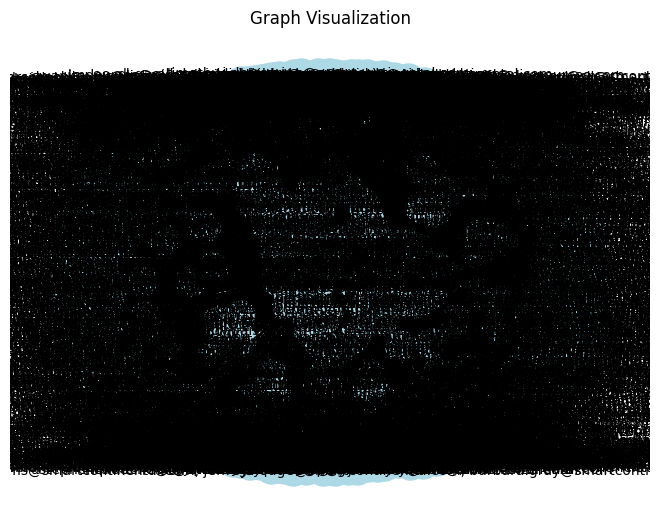

In [155]:
# Assuming you have a DataFrame called 'features_df'
pagerank_scores = generate_graph(features_df)
email_address = 'david.woon@smartcontinental.com'

# Calculate the PageRank score for the specified email address
try:
    score = pagerank_scores[email_address]
    print(f"PageRank score for {email_address}: {score}")
except KeyError:
    print(f"No PageRank score found for {email_address}")

# Print the graph G
print("Nodes in the graph:")
print(G.nodes())
print("Edges in the graph:")
print(G.edges())

# Plot the graph

pos = nx.spring_layout(G)  # Layout algorithm (you can change this)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title('Graph Visualization')

# Save the graph as a PDF
plt.savefig('graph_visualization.pdf', format='pdf')

# Show the graph (optional)
plt.show()


In [83]:
import numpy as np
from collections import defaultdict

def calculate_node_num_dict(features_df):
    # Extract unique 'From' and 'To' values
    from_users = features_df['From_list'].unique()
    to_users = features_df['To_list'].unique()

    # Merge the lists to get all unique users
    all_users = np.concatenate((from_users, to_users), axis=None)

    # Initialize dictionaries and counters
    node_num_dict = {}
    count = 1

    # Create User Dictionary
    for user in all_users:
        if user not in node_num_dict:
            node_num_dict[user] = count
            count += 1

    return node_num_dict

# Example usage:
# Replace 'features_df' with your actual DataFrame
# node_num_dict = calculate_node_num_dict(features_df)


In [86]:
node_num_dict = calculate_node_num_dict(features_df)

In [88]:
node_num_dict

{'david.woon@smartcontinental.com': 1,
 'ndavid@erac.com': 2,
 'heather.kroll@smartcontinental.com': 3,
 'eetzr@gtlaw.com': 4,
 'emories@corp.classmates.com': 5,
 'chris.booth@smartcontinental.com': 6,
 'administration.smartcontinental@smartcontinental.com': 7,
 'steven.krimsky@smartcontinental.com': 8,
 'alice.wright@smartcontinental.com': 9,
 'sylvia.hu@smartcontinental.com': 10,
 'ben.jacoby@smartcontinental.com': 11,
 'no.address@smartcontinental.com': 12,
 'kathleen.carnahan@smartcontinental.com': 13,
 't..hodge@smartcontinental.com': 14,
 'carlos.sole@smartcontinental.com': 15,
 'larry.pardue@smartcontinental.com': 16,
 'andy.pais@smartcontinental.com': 17,
 'suzanne.adams@smartcontinental.com': 18,
 'genia.fitzgerald@smartcontinental.com': 19,
 'wner-coastal@lists.openworld.co.uk': 20,
 'lisa@casa-de-clarke.com': 21,
 'ashford496@yahoo.com': 22,
 'esources.human@smartcontinental.com': 23,
 'exchange.administrator@smartcontinental.com': 24,
 'american.analyst.x@crmems.com': 25,
 

In [89]:
import numpy as np
from collections import defaultdict

def calculate_edge_list(features_df, node_num_dict):
    edge_list = []

    for i in range(len(features_df)):
        from_user = features_df.iloc[i]['From_list']
        to_user = features_df.iloc[i]['To_list']

        # Check if both 'From' and 'To' users are in the node_num_dict
        if from_user in node_num_dict and to_user in node_num_dict:
            edge_list.append((node_num_dict[from_user], node_num_dict[to_user]))

    return edge_list

# Example usage:
# Replace 'features_df' and 'node_num_dict' with your actual DataFrame and node_num_dict
# edge_list = calculate_edge_list(features_df, node_num_dict)


In [90]:
edge_list= calculate_edge_list(features_df, node_num_dict)

In [97]:
import numpy as np
from collections import defaultdict

def calculate_weight_dict(features_df, node_num_dict):
    weight_dict = {}

    for i in range(len(features_df)):
        from_user = features_df.iloc[i]['From_list']
        to_user = features_df.iloc[i]['To_list']

        # Check if both 'From' and 'To' users are in the node_num_dict
        if from_user in node_num_dict and to_user in node_num_dict:
            from_node = node_num_dict[from_user]
            to_node = node_num_dict[to_user]

            edge_df = features_df[(features_df['From'] == from_user) & (features_df['To'] == to_user)]
            temp_count = edge_df['From'].count()

            if temp_count != 0:
                weight_dict[(from_node, to_node)] = temp_count

            reverse_edge_df = features_df[(features_df['From'] == to_user) & (features_df['To'] == from_user)]
            temp_reverse_count = reverse_edge_df['From'].count()

            if temp_reverse_count != 0:
                weight_dict[(to_node, from_node)] = temp_reverse_count

    return weight_dict

# Example usage:
# Replace 'features_df' and 'node_num_dict' with your actual DataFrame and node_num_dict
# weight_dict = calculate_weight_dict(features_df, node_num_dict)


In [98]:
weight_dict =  calculate_weight_dict(features_df, node_num_dict)

In [120]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

def generate_graph(rank_matrix, edge_list, node_num, weighted_vector, node_num_dict):
  dot = Digraph(comment='The Round Table')
  for edge in edge_list:
    dot.edge(str(reverse_node_num[edge[0]]),str(reverse_node_num[edge[1]]))
  dot.render('round-table.gv', view=True)

reverse_node_num = {}
for node in node_num_dict:
  reverse_node_num[node_num_dict[node]] = node
generate_graph(page_rank_vector, edge_list, 101, weight_dict, reverse_node_num)


In [156]:
# response

In [157]:
import numpy as np
import pandas as pd
import xlrd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import gensim

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [164]:

email_df = pd.read_csv('https://raw.githubusercontent.com/venuannamdas/E_clean_AI/master/smartcontinental.csv',index_col=None,header=0)
email_df.Date_list = email_df.Date_list.str.replace(',','')
print(email_df.shape)
print("The Label Distribution for the Email dataset:\n", email_df['Label'].value_counts())

(9571, 7)
The Label Distribution for the Email dataset:
 required_response    4957
reply                4435
time_waste            179
Name: Label, dtype: int64


Preprocessing:
Removing punctutations

Stemming using porter stemmer

In [165]:

# Perform text Preprocessing - Stemming using Porter Stemmer
preprocessed_Subject, preprocessed_content = [], []

for index, row in email_df.iterrows():
    stem_sub, stem_cont = [], []

    if(not pd.isnull(row['subject_list'])):
      # Removing punctuations from the sentence
      sentence = re.sub(r'[^0-9A-Za-z]+', ' ', row['subject_list'])
      for word in word_tokenize(sentence):
          # Replace the word with stem word
          stem_word = PorterStemmer().stem(word)
          stem_cont.append(stem_word)
    else:
      stem_cont.append(' ')

    if(not pd.isnull(row['Title'])):
      # Removing punctuations from the sentence
      sentence = re.sub(r'[^0-9A-Za-z]+', ' ', row['Title'])
      for word in word_tokenize(sentence):
          # Replace the word with stem word
          stem_word = PorterStemmer().stem(word)
          stem_sub.append(stem_word)
      else:
        stem_sub.append(' ')

    preprocessed_Subject.append(' '.join([word for word in stem_sub]))
    preprocessed_content.append(' '.join([word for word in stem_cont]))


email_df['processed_subject'] = preprocessed_Subject
email_df['processed_content'] = preprocessed_content
print(email_df.shape)
print(email_df.columns)

(9571, 9)
Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'processed_subject', 'processed_content'],
      dtype='object')


POS tagging

Generate POS tags for the email Subject(preprocessed) and generate sentence with tags in "word/POStag" format.

Generate POS tags for the email Content(preprocessed) and generate sentence with tags in "word/POStag" format.

In [166]:

# Method to compute the POS tags for an input column

def generatePOS(sentence_list):
  sentlist_posTagged = []

  for sentence in sentence_list:
    word_tokens = nltk.word_tokenize(sentence)
    # Get the POS tags for the word tokens
    POS_word_tokens = nltk.pos_tag(word_tokens)

    # Concatenate word/pos_tag format
    sent_posTagged = ' '.join([entity[0]+"/"+entity[1] for entity in POS_word_tokens])
    sentlist_posTagged.append(sent_posTagged)

  return pd.DataFrame(sentlist_posTagged)

  # Store the POS tagged Subject and Content into the dataframe

email_df['SubjectPOS'] = generatePOS(email_df['processed_subject'])
email_df['ContentPOS'] = generatePOS(email_df['processed_content'])

print(email_df.shape)
print(email_df.columns)

(9571, 11)
Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'processed_subject', 'processed_content', 'SubjectPOS',
       'ContentPOS'],
      dtype='object')


Model 1 - Weighted Doc2Vec Sentence embedding

Generate sentence vectors for POS tagged Subject using Doc2Vec - Weight vectors 200

Generate sentence vectors for POS tagged Content using Doc2vec - Weight vectors 200

Generate sentence vectors for From using Doc2vec - Weight vectors 50

Generate sentence vectors for To using Doc2vec - Weight vectors 50

Generate sentence vectors for Date using Doc2vec - Weight vectors 50

Concatenate the vectors

In [167]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import pandas as pd


def Doc2Vec_Emailvectors(To_list, From_list, email_date, Subject_list, Content_list):
    # Step 1 - Generating tagged documents with a list of words and their associated tags
    df_from_tagged = [TaggedDocument(d.split(), [i]) for i, d in enumerate(From_list)]
    df_to_tagged = [TaggedDocument(d.split(), [i]) for i, d in enumerate(To_list)]
    df_date_tagged = [TaggedDocument(d.split(), [i]) for i, d in enumerate(email_date)]
    df_subject_tagged = [TaggedDocument(d.split(), [i]) for i, d in enumerate(Subject_list)]
    df_content_tagged = [TaggedDocument(d.split(), [i]) for i, d in enumerate(Content_list)]

    # Step 2 - Define the model and build the vocab for the SubjectPOS tags
    d2vmodel = Doc2Vec(min_count=1, vector_size=200, epochs=50)
    d2vmodel.build_vocab(df_subject_tagged)

    df_subject_vectors = []
    for d in df_subject_tagged:
        df_subject_vectors.append(d2vmodel.infer_vector(d.words))
    df_subject_vectors = pd.DataFrame(df_subject_vectors)

    # Step 3 - Define the model and build the vocab for the contentPOS tags
    d2vmodel = Doc2Vec(min_count=1, vector_size=200, epochs=50)
    d2vmodel.build_vocab(df_content_tagged)
    df_content_vectors = []
    for d in df_content_tagged:
        df_content_vectors.append(d2vmodel.infer_vector(d.words))
    df_content_vectors = pd.DataFrame(df_content_vectors)

    # Concatenate the 2 feature vectors into a single feature vector
    df_subjectContent_vectors = np.concatenate((df_subject_vectors, df_content_vectors), axis=1)

    # Step 4 - Define the model and build the vocab for the From tags
    d2vmodel = Doc2Vec(min_count=1, vector_size=50, epochs=50)
    d2vmodel.build_vocab(df_from_tagged)
    df_from_vectors = []
    for d in df_from_tagged:
        df_from_vectors.append(d2vmodel.infer_vector(d.words))
    df_from_vectors = pd.DataFrame(df_from_vectors)

    # Step 5 - Define the model and build the vocab for the To tags
    d2vmodel = Doc2Vec(min_count=1, vector_size=50, epochs=50)
    d2vmodel.build_vocab(df_to_tagged)
    df_to_vectors = []
    for d in df_to_tagged:
        df_to_vectors.append(d2vmodel.infer_vector(d.words))
    df_to_vectors = pd.DataFrame(df_to_vectors)

    # Concatenate the 2 feature vectors into a single feature vector
    df_fromTo_vectors = np.concatenate((df_from_vectors, df_to_vectors), axis=1)

    df_fromToContent_vectors = np.concatenate((df_subjectContent_vectors, df_fromTo_vectors), axis=1)

    # Step 6 - Define the model and build the vocab for the Date tags
    d2vmodel = Doc2Vec(min_count=1, vector_size=50, epochs=50)
    d2vmodel.build_vocab(df_date_tagged)
    df_date_vectors = []
    for d in df_date_tagged:
        df_date_vectors.append(d2vmodel.infer_vector(d.words))
    df_date_vectors = pd.DataFrame(df_date_vectors)

    df_EmailContent_vectors = np.concatenate((df_fromToContent_vectors, df_date_vectors), axis=1)
    print(df_EmailContent_vectors.shape)

    return pd.DataFrame(df_EmailContent_vectors)

# Generate Concatenated vectors for Train dataset
df_train_emailCombined_vectors = Doc2Vec_Emailvectors(
    email_df['To_list'], email_df['From_list'], email_df['Date_list'], email_df['SubjectPOS'], email_df['ContentPOS']
)

# Print the shape of the resulting vectors
print("Shape of the concatenated vectors:", df_train_emailCombined_vectors.shape)

# Note: Make sure to replace the sample data with your actual data in the 'email_df' DataFrame.

from sklearn.model_selection import train_test_split

# Assuming you have already defined df_train_emailCombined_vectors and email_df

# Split the input data into Training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(
    df_train_emailCombined_vectors,
    email_df['Label'],
    test_size=0.25,
    shuffle=True,
    stratify=email_df['Label'],
    random_state=0
)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_test.shape)
print("Training label distribution:\n", Y_train.value_counts())



(9571, 550)
Shape of the concatenated vectors: (9571, 550)
Training data shape: (7178, 550)
Validation data shape: (2393, 550)
Training label distribution:
 required_response    3718
reply                3326
time_waste            134
Name: Label, dtype: int64


Model 1 - Train and Test the Doc2Vec generated vectors using SVM
Ground truth measured using

Accuracy

F1 Score

Classification Metrics

In [168]:
# Fit the model for the classifier
clf_doc2vec = SVC(max_iter =10000, C=1).fit(X_train, Y_train)

# Predicting the class labels for Test data
Y_test_pred = clf_doc2vec.predict(X_test)

print('Classification Model 1 - SVM - Doc2Vec TEST metrics:\nAccuracy -',round(accuracy_score(Y_test,Y_test_pred),4))
print('f1 score -', round(f1_score(Y_test,Y_test_pred,labels=None, pos_label=1, average='weighted'),4))
print('Classification Report:\n',classification_report(Y_test, Y_test_pred))

Classification Model 1 - SVM - Doc2Vec TEST metrics:
Accuracy - 0.6874
f1 score - 0.6645
Classification Report:
                    precision    recall  f1-score   support

            reply       0.61      0.96      0.75      1109
required_response       0.88      0.47      0.61      1239
       time_waste       0.00      0.00      0.00        45

         accuracy                           0.69      2393
        macro avg       0.50      0.48      0.45      2393
     weighted avg       0.74      0.69      0.66      2393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 2 - Tf-Idf (Term frequency - Inverse Document frequency)

Step 1 - Convert the collection of email corpus to matrix of token counts using Count Vectorizer

Step 2 - Transform the count matrix into normalized TF or TF-IDF form.

Step 3 - Train and test using the classifier for each sentence

In [169]:

# Split the sentences into training and validation by stratifying the samples.
email_df['SubjectPOS'] = [''.join([word for word in subject]) for subject in email_df['SubjectPOS']]
email_df['ContentPOS'] = [''.join([word for word in content]) for content in email_df['ContentPOS']]

email_df['Merged_email'] = email_df[['To_list','From_list','Date_list','SubjectPOS','ContentPOS']].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(email_df['Merged_email'], email_df['Label'], test_size=0.25, shuffle = True, stratify = email_df['Label'], random_state=0)
#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print("The Label Distribution for the Training dataset:\n", Y_train.value_counts())

# Step 1 - Generate the token matrix
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Step 2 - Transform the count matrix to TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#print(X_train_tfidf.shape, X_test_tfidf.shape,Y_train.shape, Y_test.shape)

The Label Distribution for the Training dataset:
 required_response    3718
reply                3326
time_waste            134
Name: Label, dtype: int64


Model 2 - Train and Test the TfIdf generated frequency corpus using Naive
Ground truth measured using

Accuracy

F1 Score

Classification Metrics

In [170]:

# Fit the model for the classifier
clf = MultinomialNB().fit(X_train_tfidf, Y_train)

# Predicting the class labels for Test data
Y_test_pred = clf.predict(X_test_tfidf)

print('Classification Model 2 - K- Neighbors classifier Classifier Tf-Idf TEST metrics:\nAccuracy -',round(accuracy_score(Y_test,Y_test_pred),4))
print('f1 score -', round(f1_score(Y_test,Y_test_pred,labels=None, pos_label=1, average='weighted'),4))
print('Classification Report:\n',classification_report(Y_test, Y_test_pred))

Classification Model 2 - K- Neighbors classifier Classifier Tf-Idf TEST metrics:
Accuracy - 0.5491
f1 score - 0.5261
Classification Report:
                    precision    recall  f1-score   support

            reply       0.54      0.35      0.43      1109
required_response       0.55      0.75      0.64      1239
       time_waste       0.00      0.00      0.00        45

         accuracy                           0.55      2393
        macro avg       0.36      0.37      0.35      2393
     weighted avg       0.54      0.55      0.53      2393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
